In [27]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


iris=pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
pd.DataFrame(iris)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [34]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [36]:
print(iris.shape)

(150, 5)


In [37]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [47]:
iris.dropna()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [92]:
x=iris.iloc[:,0:4]
print(x)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[149 rows x 4 columns]


In [65]:
y=iris.iloc[:,4].values
print(y)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

In [61]:
iris.duplicated().any()
iris.drop_duplicates(inplace=True)
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]


In [68]:
conv=LabelEncoder()
cot=conv.fit_transform(y)
print(cot)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,cot,test_size=0.25,random_state=2)
print(x_train)

     sepal.length  sepal.width  petal.length  petal.width
71            6.1          2.8           4.0          1.3
143           6.8          3.2           5.9          2.3
81            5.5          2.4           3.7          1.0
11            4.8          3.4           1.6          0.2
100           6.3          3.3           6.0          2.5
..            ...          ...           ...          ...
75            6.6          3.0           4.4          1.4
43            5.0          3.5           1.6          0.6
22            4.6          3.6           1.0          0.2
72            6.3          2.5           4.9          1.5
15            5.7          4.4           1.5          0.4

[111 rows x 4 columns]


In [95]:
print(y_train)

[1 2 1 0 2 0 2 0 0 0 2 0 2 1 2 2 0 0 1 1 2 1 0 1 2 0 2 0 1 0 2 1 1 0 2 1 1
 2 0 1 0 2 2 0 1 0 0 0 2 1 0 0 2 2 1 2 1 1 2 0 2 2 2 0 2 0 0 1 2 1 2 1 1 2
 1 1 1 2 1 2 1 0 1 1 1 1 2 1 0 2 0 2 1 2 0 2 0 2 2 0 1 0 2 1 0 2 1 0 0 1 0]


In [76]:
print(x_test)

     sepal.length  sepal.width  petal.length  petal.width
115           6.4          3.2           5.3          2.3
48            5.3          3.7           1.5          0.2
3             4.6          3.1           1.5          0.2
42            4.4          3.2           1.3          0.2
126           6.2          2.8           4.8          1.8
24            4.8          3.4           1.9          0.2
108           6.7          2.5           5.8          1.8
12            4.8          3.0           1.4          0.1
127           6.1          3.0           4.9          1.8
140           6.7          3.1           5.6          2.4
5             5.4          3.9           1.7          0.4
54            6.5          2.8           4.6          1.5
128           6.4          2.8           5.6          2.1
35            5.0          3.2           1.2          0.2
130           7.4          2.8           6.1          1.9
82            5.8          2.7           3.9          1.2
25            

In [77]:
print(y_test)

[2 0 0 0 2 0 2 0 2 2 0 1 2 0 2 1 0 1 2 2 1 1 1 1 0 0 1 1 0 0 1 2 0 0 1 2 1
 1]


In [86]:
ball=KNeighborsClassifier(n_neighbors=12)
ball.fit(x_train,y_train)
y_ans=ball.predict(x_test)
print(y_ans)
print(y_test)

[2 0 0 0 2 0 2 0 2 2 0 1 2 0 2 1 0 1 2 2 1 1 1 1 0 0 1 1 0 0 1 2 0 0 1 2 2
 1]
[2 0 0 0 2 0 2 0 2 2 0 1 2 0 2 1 0 1 2 2 1 1 1 1 0 0 1 1 0 0 1 2 0 0 1 2 1
 1]


In [87]:
print(ball.predict_proba(x_test))

[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.41666667 0.58333333]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.91666667 0.08333333]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.91666667 0.08333333]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.91666667 0.08333333]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.  

In [99]:
print(accuracy_score(y_test,y_ans,normalize=False))
conma=confusion_matrix(y_test,y_ans,normalize=None,labels=ball.classes_)
print(conma)

37
[[14  0  0]
 [ 0 12  1]
 [ 0  0 11]]


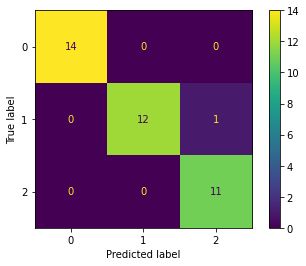

In [100]:
conma_dis=ConfusionMatrixDisplay(confusion_matrix=conma,display_labels=ball.classes_)
conma_dis.plot()
plt.show()